In [1]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('output/ratingDiff_turns.csv') #change for different .csv file

# Splitting Results into Different White Starting Moves

In [3]:
#check how many different white moves
data["white_first_move"].nunique()

19

In [4]:
#function to separate different white move rows
def get(data, name):
    new = data[(data["white_first_move"] == name)]
    new = new.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    return new


#create 19 dataframes because there are 19 different white_first_move
e4 = get(data,"e4")
d4 = get(data, "d4")
Nf3 = get(data,"Nf3")
f4 = get(data, "f4")
c4 = get(data,"c4")
e3 = get(data, "e3")
b3 = get(data,"b3")
f3 = get(data, "f3")
g3 = get(data,"g3")
b4 = get(data, "b4")
a3 = get(data,"a3")
g4 = get(data, "g4")
Nh3 = get(data,"Nh3")
Nc3 = get(data, "Nc3")
d3 = get(data,"d3")
h4 = get(data, "h4")
c3 = get(data,"c3")
h3 = get(data, "h3")
a4 = get(data,"a4")


### ['e4', 'd4', 'Nf3', 'f4', 'c4', 'e3', 'b3', 'f3', 'g3', 'b4', 'a3','g4', 'Nh3', 'Nc3', 'd3', 'h4', 'c3', 'h3', 'a4']

In [5]:
#plot boxplot graph to see the probability of each black_move to be the move_1/move_2/move_3.... 
def graph(data):
    name = data["white_first_move"][0]
    f, axes = plt.subplots(1, 5, figsize=(40,20))
    sb.boxplot(y = "black_move_1_prob" , x = "black_move_1", data = data, ax = axes[0]).set(title = "white_move is "+ name)
    sb.boxplot(y = "black_move_2_prob" , x = "black_move_2", data = data, ax = axes[1])
    sb.boxplot(y = "black_move_3_prob" , x = "black_move_3", data = data, ax = axes[2])
    sb.boxplot(y = "black_move_4_prob" , x = "black_move_4", data = data, ax = axes[3])
    sb.boxplot(y = "black_move_5_prob" , x = "black_move_5", data = data, ax = axes[4])


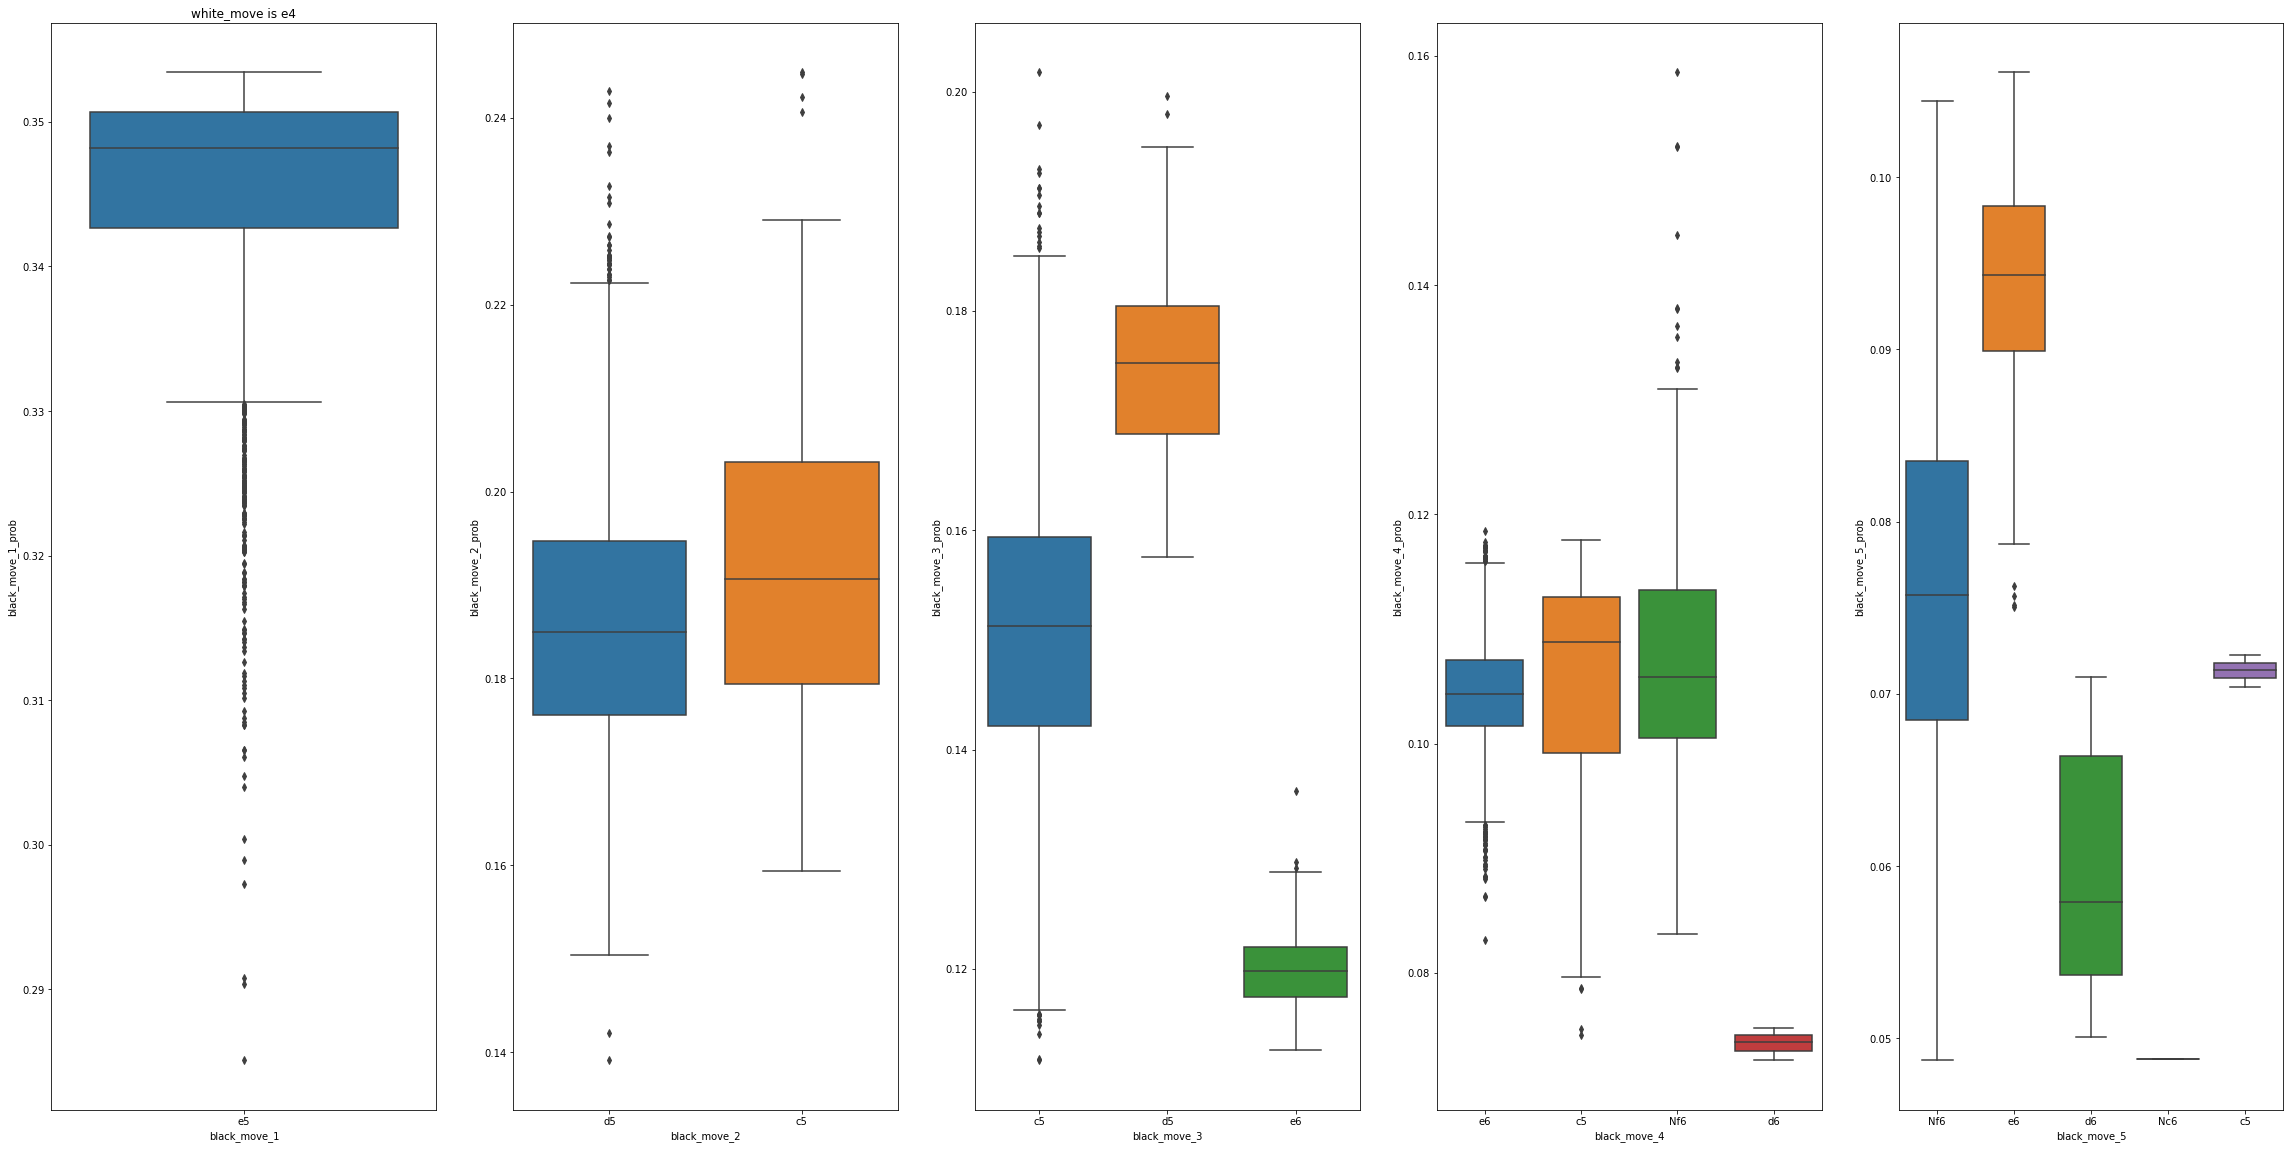

In [6]:
#example of the graph
graph(e4)

In [7]:
# can uncomment this to see the graphs for all 19 different white_first_move
# array = [e4, d4, Nf3, f4, c4, e3, b3, f3, g3, b4, a3,g4, Nh3, Nc3, d3, h4, c3, h3, a4]
# for i in array:
#     graph(i)

In [8]:
data

,Unnamed: 0,white_first_move,black_move_1,black_move_1_prob,black_move_2,black_move_2_prob,black_move_3,black_move_3_prob,black_move_4,black_move_4_prob,black_move_5,black_move_5_prob,black_first_move,score,rating_diff,turns
0,0,e4,e5,0.343180,d5,0.155795,c5,0.128948,e6,0.104680,Nf6,0.054449,e5,43.603160,108,3
1,1,e4,e5,0.343108,c5,0.182095,d5,0.177650,e6,0.093758,Nf6,0.083099,e5,39.002405,-366,44
2,2,e4,e5,0.353220,d5,0.187279,e6,0.120623,c5,0.112077,Nf6,0.064297,e5,42.175712,534,65
3,3,e4,e5,0.344036,c5,0.180701,d5,0.165165,e6,0.092523,Nf6,0.073528,d6,0.000000,-415,16
4,4,e4,e5,0.353100,d5,0.178887,e6,0.117027,c5,0.116847,Nf6,0.061445,d5,21.622800,422,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,4003,d4,e5,0.289654,d5,0.155724,e6,0.112745,c5,0.096589,Nf6,0.059627,f5,0.000000,471,24
4004,4004,d4,e5,0.300444,d5,0.192796,c5,0.141525,e6,0.106050,Nf6,0.101400,d6,0.000000,37,82
4005,4005,d4,e5,0.300679,d5,0.170101,c5,0.141031,e6,0.102780,Nf6,0.083053,d5,21.325436,-67,35
4006,4006,e4,e5,0.340449,d5,0.207010,c5,0.146617,e6,0.106073,Nf6,0.093063,d6,0.000000,133,109


In [9]:
#separate move_1/move_2/move_3/... into 5 different data frames
data_1 = pd.DataFrame(data = data, columns = ["white_first_move","black_move_1", "black_move_1_prob"])
data_2 = pd.DataFrame(data = data, columns = ["white_first_move","black_move_2", "black_move_2_prob"])
data_3= pd.DataFrame(data = data, columns = ["white_first_move","black_move_3", "black_move_3_prob"])
data_4= pd.DataFrame(data = data, columns = ["white_first_move","black_move_4", "black_move_4_prob"])
data_5= pd.DataFrame(data = data, columns = ["white_first_move","black_move_5", "black_move_5_prob"])

In [10]:
#rename all the columns to be the same name before merging the five data frame
data_1.rename(columns = {'black_move_1':'black_move', 'black_move_1_prob':'black_move_prob'}, inplace = True)
data_2.rename(columns = {'black_move_2':'black_move', 'black_move_2_prob':'black_move_prob'}, inplace = True)
data_3.rename(columns = {'black_move_3':'black_move', 'black_move_3_prob':'black_move_prob'}, inplace = True)
data_4.rename(columns = {'black_move_4':'black_move', 'black_move_4_prob':'black_move_prob'}, inplace = True)
data_5.rename(columns = {'black_move_5':'black_move', 'black_move_5_prob':'black_move_prob'}, inplace = True)

In [11]:
#merge the five data frames, reason of merging all the five data frames is because I can see the overall distribution of 
#the probability for each move no matter it is in move_1/move_2/move_3/....
frames = [data_1, data_2, data_3, data_4, data_5]
data2 = pd.concat(frames)
data2

,white_first_move,black_move,black_move_prob
0,e4,e5,0.343180
1,e4,e5,0.343108
2,e4,e5,0.353220
3,e4,e5,0.344036
4,e4,e5,0.353100
...,...,...,...
4003,d4,Nf6,0.059627
4004,d4,Nf6,0.101400
4005,d4,Nf6,0.083053
4006,e4,Nf6,0.093063


In [12]:
#same, create 19 variables because there are 19 different white_first_move 
final_e4 =  get(data2,"e4")
final_d4 = get(data2, "d4")
final_Nf3 = get(data2,"Nf3")
final_f4 = get(data2, "f4")
final_c4 = get(data2,"c4")
final_e3 = get(data2, "e3")
final_b3 = get(data2,"b3")
final_f3 = get(data2, "f3")
final_g3 = get(data2,"g3")
final_b4 = get(data2, "b4")
final_a3 = get(data2,"a3")
final_g4 = get(data2, "g4")
final_Nh3 = get(data2,"Nh3")
final_Nc3 = get(data2, "Nc3")
final_d3 = get(data2,"d3")
final_h4 = get(data2, "h4")
final_c3 = get(data2,"c3")
final_h3 = get(data2, "h3")
final_a4 = get(data2,"a4")

In [13]:
#function that plot boxplot of probability of black_move_prob againts black_move
def plot(final):
    name =  final["white_first_move"][0]
    f,axes = plt.subplots(1,1, figsize = (5,10))
    sb.boxplot(y = "black_move_prob" , x = "black_move" , data = final).set(title = "White_move is "+ name)

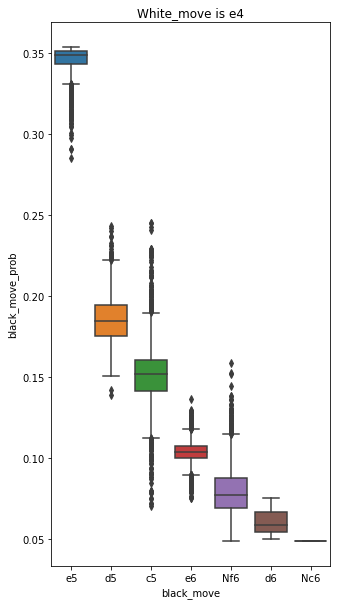

In [14]:
#example
plot(final_e4)

In [15]:
#using: e4, move 1
df1 = data[(data['white_first_move'] == 'e4')]
df1 = df1.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 2 of d5
df2i = df1[(df1['black_move_2'] == 'd5')]
df2i = df2i.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 2 of c5
df2ii = df1[(df1['black_move_2'] == 'c5')]
df2ii = df2ii.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 3 of c5
df3i = df1[(df1['black_move_3'] == 'c5')]
df3i = df3i.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 3 of d5
df3ii = df1[(df1['black_move_3'] == 'd5')]
df3ii = df3ii.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 3 of e6
df3iii = df1[(df1['black_move_3'] == 'e6')]
df3iii = df3iii.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 4 of c5
df4i = df1[(df1['black_move_4'] == 'e6')]
df4i = df4i.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 4 of d5
df4ii = df1[(df1['black_move_4'] == 'c5')]
df4ii = df4ii.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 4 of e6
df4iii = df1[(df1['black_move_4'] == 'Nf6')]
df4iii = df4iii.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

#using: e4, move 4 of e6
df4iv = df1[(df1['black_move_4'] == 'd6')]
df4iv = df4iv.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')


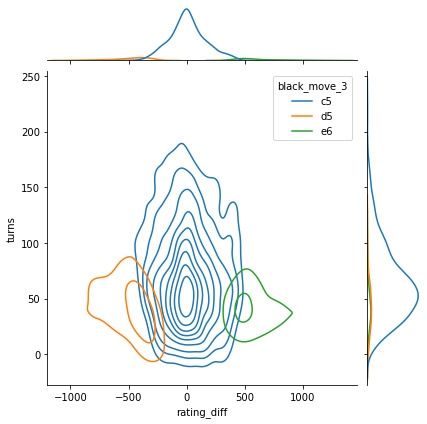

In [16]:
sb.jointplot(data=df1, x="rating_diff", y="turns", hue="black_move_3", kind="kde")

<IPython.core.display.Javascript object>


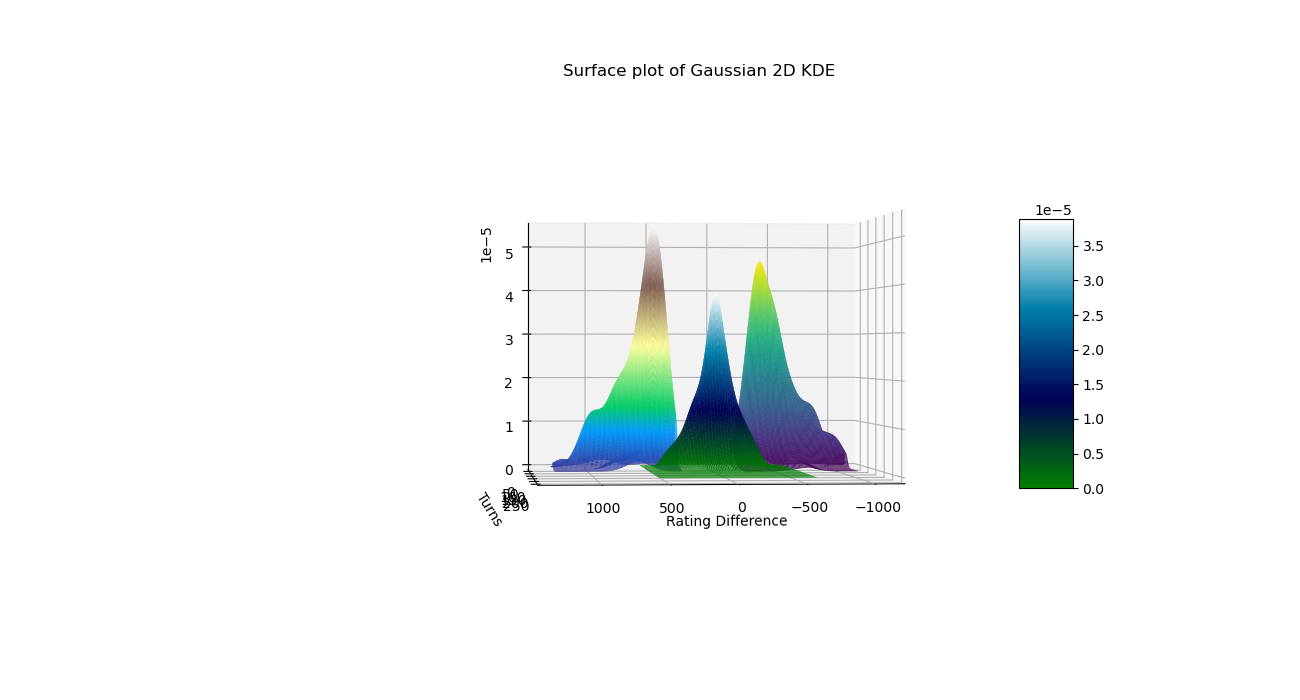

In [17]:
import scipy.stats as st

def plotKDE(x, y):
    #x = data['rating_diff']
    #y = data['turns']

    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY

    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

    # Fit a gaussian kernel using the scipy’s gaussian_kde method
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    return xx, yy, f

%matplotlib notebook

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')


a, b, c = plotKDE(df3ii['rating_diff'], df3ii['turns'])
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
a, b, c = plotKDE(df3iii['rating_diff'], df3iii['turns'])
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, cmap='terrain', edgecolor='none')
a, b, c = plotKDE(df3i['rating_diff'], df3i['turns'])
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, cmap='ocean', edgecolor='none')

ax.set_xlabel('Rating Difference')
ax.set_ylabel('Turns')
ax.set_title('Surface plot of Gaussian 2D KDE')

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(0, 85)


<IPython.core.display.Javascript object>


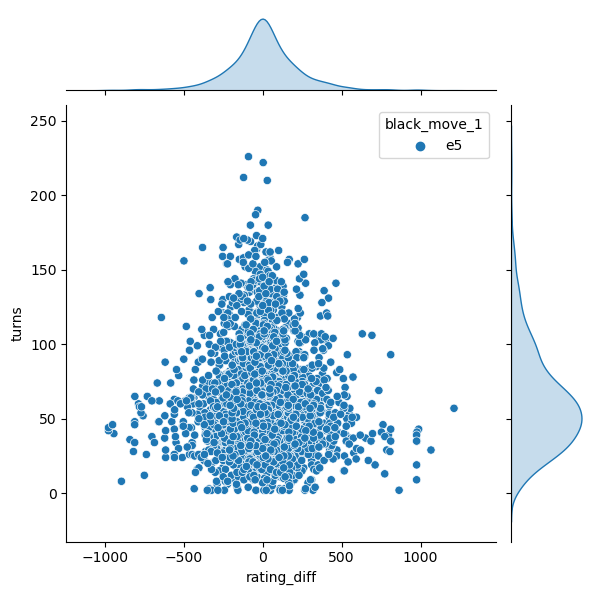

In [18]:
sb.jointplot(data = df1, x = 'rating_diff', y = 'turns', hue = 'black_move_1') 
